# Navigation

---

In this notebook, we use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Start the environment

We begin by importing some necessary packages.  

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import matplotlib.pyplot as plt

import rl_lib
from rl_lib.a2c_agent import A2CAgent
from rl_lib.a2c_training import a2c_training

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

In [2]:
env = UnityEnvironment(file_name="Reacher.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# get information about the environment

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


## 2. Train the agent

### 2.1 A2C algorithm

In the next cells, we train an agent using the A2C algorithm.

In [5]:
# general training settings
Settings = {
    "n_episodes": 2000, # maximum number of training episodes
    "t_min": 10, # minimum number of timesteps per episode
    "update_t_every_n_episode": 100, # increase t by 1 every n episode
    "t_max": 10, # maximum number of timesteps per episode
    "min_avg_score": 30., # minimum average score over 100 episodes that the agent must achieve to consider the task fulfilled
    "continue_learning": True, # if true, the agent continues to learn after reaching min_avg_score until reaching n_episodes
    "filename": "A2C", #  name for the file that contains the trained network parameters
}

In [6]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "nr_agents": num_agents,
    "seed": 997, # random seed
    "gamma": 0.99, # discount factor
    "learning_rate": 1e-4, # learning rate
    "entropy_weight": 1e-5, # weight for entropy loss
    "use_same_network_for_actor_critic": False, # if yes, the actor and critic share layers in the NN
    "constant_var": True # if no, variance of Gaussian distribution for action sampling is learned
}

agent_separateNetwork_constantVar = A2CAgent(**AgentInput)

In [7]:
Settings["filename"] = "A2C_separateNetwork_constantVar_"
scores_separateNetwork_constantVar = a2c_training(env, brain_name, agent_separateNetwork_constantVar, **Settings)

Episode 100	Average Score: 1.74
Episode 200	Average Score: 4.50
Episode 300	Average Score: 7.67
Episode 400	Average Score: 18.42
Episode 454	Average Score: 29.96
Environment solved in 355 episodes!	Average Score: 30.13
Episode 500	Average Score: 36.50
Episode 600	Average Score: 38.54
Episode 700	Average Score: 38.82
Episode 800	Average Score: 38.89
Episode 900	Average Score: 38.99
Episode 1000	Average Score: 39.02
Episode 1100	Average Score: 39.02
Episode 1200	Average Score: 39.13
Episode 1300	Average Score: 39.13
Episode 1400	Average Score: 39.17
Episode 1500	Average Score: 39.17
Episode 1600	Average Score: 39.13
Episode 1700	Average Score: 39.18
Episode 1800	Average Score: 39.24
Episode 1900	Average Score: 39.25
Episode 2000	Average Score: 39.24


In [8]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "nr_agents": num_agents,
    "seed": 997, # random seed
    "gamma": 0.99, # discount factor
    "learning_rate": 1e-4, # learning rate
    "entropy_weight": 1e-5, # weight for entropy loss
    "use_same_network_for_actor_critic": False, # if yes, the actor and critic share layers in the NN
    "constant_var": False # if no, variance of Gaussian distribution for action sampling is learned
}

agent_separateNetwork_learnedVar = A2CAgent(**AgentInput)

In [9]:
Settings["filename"] = "A2C_separateNetwork_learnedVar_"
scores_separateNetwork_learnedVar = a2c_training(env, brain_name, agent_separateNetwork_learnedVar, **Settings)

Episode 100	Average Score: 1.80
Episode 200	Average Score: 4.27
Episode 300	Average Score: 7.52
Episode 400	Average Score: 16.37
Episode 500	Average Score: 26.28
Episode 539	Average Score: 29.93
Environment solved in 440 episodes!	Average Score: 30.06
Episode 600	Average Score: 35.34
Episode 700	Average Score: 37.86
Episode 800	Average Score: 38.27
Episode 900	Average Score: 38.65
Episode 1000	Average Score: 38.91
Episode 1100	Average Score: 38.89
Episode 1200	Average Score: 38.55
Episode 1300	Average Score: 38.90
Episode 1400	Average Score: 38.78
Episode 1500	Average Score: 38.98
Episode 1600	Average Score: 39.03
Episode 1700	Average Score: 38.80
Episode 1800	Average Score: 39.03
Episode 1900	Average Score: 39.04
Episode 2000	Average Score: 38.96


In [10]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "nr_agents": num_agents,
    "seed": 997, # random seed
    "gamma": 0.99, # discount factor
    "learning_rate": 1e-4, # learning rate
    "entropy_weight": 1e-5, # weight for entropy loss
    "use_same_network_for_actor_critic": True, # if yes, the actor and critic share layers in the NN
    "constant_var": True # if no, variance of Gaussian distribution for action sampling is learned
}

agent_combinedNetwork_constantVar = A2CAgent(**AgentInput)

In [11]:
Settings["filename"] = "A2C_combinedNetwork_constantVar_"
scores_combinedNetwork_constantVar = a2c_training(env, brain_name, agent_combinedNetwork_constantVar, **Settings)

Episode 100	Average Score: 1.09
Episode 200	Average Score: 2.38
Episode 300	Average Score: 4.44
Episode 400	Average Score: 6.72
Episode 500	Average Score: 8.73
Episode 600	Average Score: 10.68
Episode 700	Average Score: 13.04
Episode 800	Average Score: 14.70
Episode 900	Average Score: 16.16
Episode 1000	Average Score: 21.04
Episode 1100	Average Score: 27.14
Episode 1127	Average Score: 29.96
Environment solved in 1028 episodes!	Average Score: 30.05
Episode 1200	Average Score: 37.49
Episode 1300	Average Score: 39.03
Episode 1400	Average Score: 39.20
Episode 1500	Average Score: 39.20
Episode 1600	Average Score: 39.31
Episode 1700	Average Score: 39.27
Episode 1800	Average Score: 39.28
Episode 1900	Average Score: 39.38
Episode 2000	Average Score: 39.41


In [12]:
# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "nr_agents": num_agents,
    "seed": 997, # random seed
    "gamma": 0.99, # discount factor
    "learning_rate": 1e-4, # learning rate
    "entropy_weight": 1e-5, # weight for entropy loss
    "use_same_network_for_actor_critic": True, # if yes, the actor and critic share layers in the NN
    "constant_var": False # if no, variance of Gaussian distribution for action sampling is learned
}

agent_combinedNetwork_learnedVar = A2CAgent(**AgentInput)

In [13]:
Settings["filename"] = "A2C_scores_combinedNetwork_learnedVar_"
scores_combinedNetwork_learnedVar = a2c_training(env, brain_name, agent_combinedNetwork_learnedVar, **Settings)

Episode 100	Average Score: 0.99
Episode 200	Average Score: 2.16
Episode 300	Average Score: 4.68
Episode 400	Average Score: 5.11
Episode 500	Average Score: 6.46
Episode 600	Average Score: 7.61
Episode 700	Average Score: 7.45
Episode 800	Average Score: 7.64
Episode 900	Average Score: 8.22
Episode 1000	Average Score: 8.69
Episode 1100	Average Score: 9.52
Episode 1200	Average Score: 10.24
Episode 1300	Average Score: 7.193
Episode 1400	Average Score: 3.73
Episode 1500	Average Score: 3.96
Episode 1600	Average Score: 3.84
Episode 1700	Average Score: 3.77
Episode 1800	Average Score: 4.48
Episode 1900	Average Score: 4.79
Episode 2000	Average Score: 4.94


## 3. Visualize results

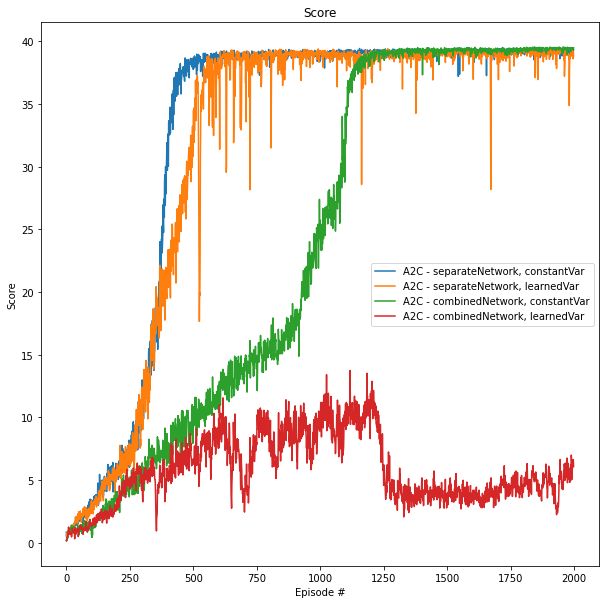

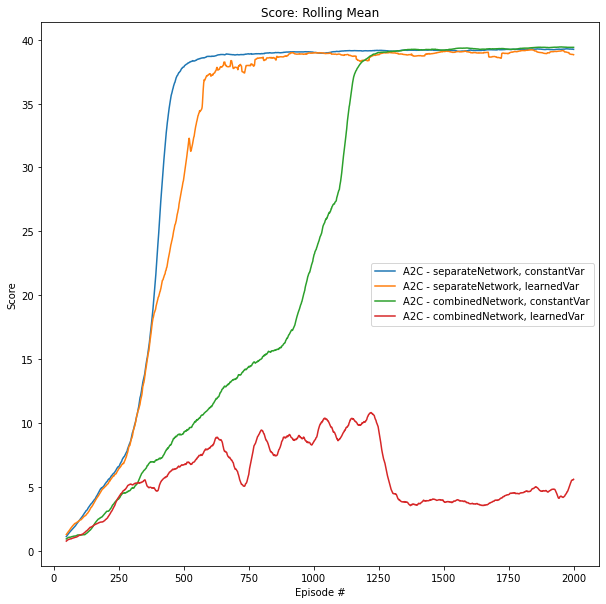

In [19]:
import pandas as pd

# plot the scores
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

a2c_plot_a, = ax.plot(np.arange(len(scores_separateNetwork_constantVar)), scores_separateNetwork_constantVar)
a2c_plot_a.set_label('A2C - separateNetwork, constantVar')

a2c_plot_b, = ax.plot(np.arange(len(scores_separateNetwork_learnedVar)), scores_separateNetwork_learnedVar)
a2c_plot_b.set_label('A2C - separateNetwork, learnedVar')

a2c_plot_c, = ax.plot(np.arange(len(scores_combinedNetwork_constantVar)), scores_combinedNetwork_constantVar)
a2c_plot_c.set_label('A2C - combinedNetwork, constantVar')

a2c_plot_d, = ax.plot(np.arange(len(scores_combinedNetwork_learnedVar)), scores_combinedNetwork_learnedVar)
a2c_plot_d.set_label('A2C - combinedNetwork, learnedVar')

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score')
ax.legend()


# plot the scores
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

a2c_plot_a, = ax.plot(pd.DataFrame(scores_separateNetwork_constantVar).rolling(50).mean())
a2c_plot_a.set_label('A2C - separateNetwork, constantVar')

a2c_plot_b, = ax.plot(pd.DataFrame(scores_separateNetwork_learnedVar).rolling(50).mean())
a2c_plot_b.set_label('A2C - separateNetwork, learnedVar')

a2c_plot_c, = ax.plot(pd.DataFrame(scores_combinedNetwork_constantVar).rolling(50).mean())
a2c_plot_c.set_label('A2C - combinedNetwork, constantVar')

a2c_plot_d, = ax.plot(pd.DataFrame(scores_combinedNetwork_learnedVar).rolling(50).mean())
a2c_plot_d.set_label('A2C - combinedNetwork, learnedVar')


plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Score: Rolling Mean')
ax.legend()


In [5]:
def visualize_agent(agent, env, env_info):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations            # get the current state
    score = np.zeros(num_agents)                     # initialize the score
    while True:
        action, actions_log_prob, entropy = agent.act(state) # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations   # get the next state
        reward = env_info.rewards                   # get the reward
        done = env_info.local_done                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if np.any(done):                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

In [6]:
# see the agent acting in the environment

# set-up the agent 
AgentInput = {
    "state_size": state_size, # dimension of each state
    "action_size": action_size, # dimension of each action
    "nr_agents": num_agents,
    "seed": 997, # random seed
    "gamma": 0.99, # discount factor
    "learning_rate": 1e-4, # learning rate
    "entropy_weight": 1e-5, # weight for entropy loss
    "use_same_network_for_actor_critic": False, # if yes, the actor and critic share layers in the NN
    "constant_var": True # if no, variance of Gaussian distribution for action sampling is learned
}

agent_separateNetwork_constantVar = A2CAgent(**AgentInput)

agent_separateNetwork_constantVar.actor.load_state_dict(
    torch.load('A2C_separateNetwork_constantVar_final_actor.pth'))
agent_separateNetwork_constantVar.critic.load_state_dict(
    torch.load('A2C_separateNetwork_constantVar_final_critic.pth'))
visualize_agent(agent_separateNetwork_constantVar, env, env_info)

Score: [39.47999912 39.00999913 39.45999912 39.59999911 39.22999912 39.09999913
 39.55999912 38.99999913 38.83999913 39.59999911 37.77999916 39.56999912
 39.59999911 37.67999916 38.86999913 39.00999913 39.03999913 39.59999911
 39.55999912 39.58999912]


When finished, you can close the environment.

In [7]:
env.close()